### Load Data

In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.set(font_scale = 1.25)
print("Setup Complete")


Setup Complete


# Context

### Load the data

In [3]:
passenger_data = pd.read_csv('./train.csv', index_col='PassengerId')
# passenger_data.head()
passenger_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


### Fields definition
- `Survived` - Survival (0 = No; 1 = Yes)
- `Pclass` - Passenger airline class (1 = first, 2 = bussiness, 3 = economy).
- `Name` - Passenger name.
- `Sex` - Sex (male, female).
- `Age` - Age in years.
- `SibSp` - Number of Siblings/Spouses Aboard
- `Parch` - Number of Parents/Children Aboard
- `Ticket` - Ticket number.
- `Fare` - Ticket fare.
- `Cabin` - Tabin (optional).
- `Embarked` - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
passenger_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


# Data quality assessment

### General Data Description

In [5]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


### Fields value describution

Text(0.5, 1.0, 'Pclass (100.0% not-null)')

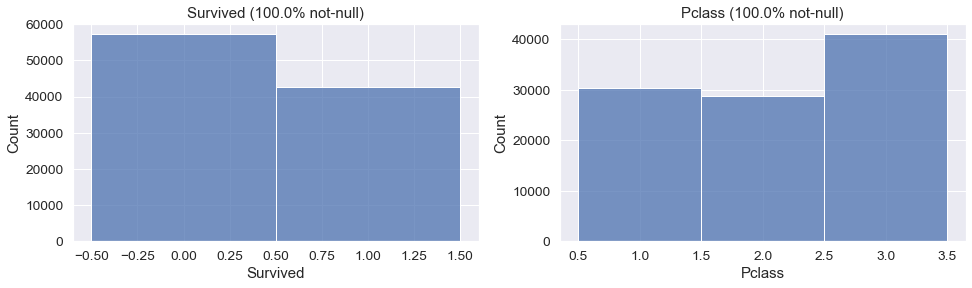

In [6]:
survived_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Survived)].Survived.shape[0] / passenger_data.Survived.shape[0] * 100
pclass_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Pclass)].Pclass.shape[0] / passenger_data.Pclass.shape[0] * 100

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="Survived", discrete=True, ax = axes[0] )
axes[0].set_title(f"Survived ({survived_not_null_percent}% not-null)")

sns.histplot(passenger_data, x="Pclass", discrete=True, ax = axes[1])
axes[1].set_title(f"Pclass ({pclass_not_null_percent}% not-null)")


Text(0.5, 1.0, 'Age (96.708% not-null)')

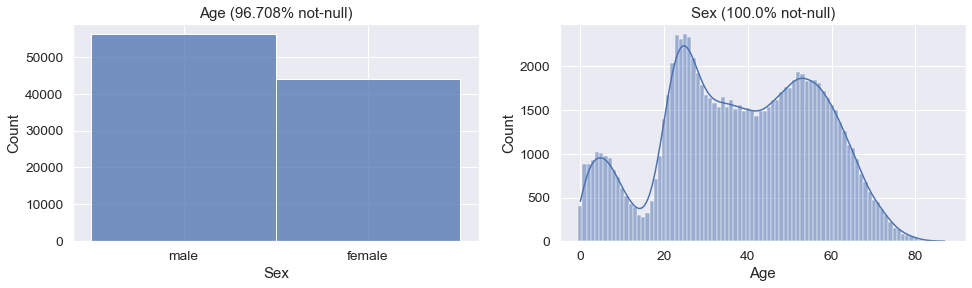

In [10]:
sex_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Sex)].Sex.shape[0] / passenger_data.Sex.shape[0] * 100
age_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Age)].Age.shape[0] / passenger_data.Age.shape[0] * 100

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="Sex", discrete=True, ax = axes[0])
axes[1].set_title(f"Sex ({sex_not_null_percent}% not-null)")

# sns.histplot(passenger_data, x="Age", discrete=True, ax = axes[1] )
sns.histplot(passenger_data, x="Age", discrete=True, ax = axes[1], kde=True )
axes[0].set_title(f"Age ({age_not_null_percent}% not-null)")


Text(0.5, 1.0, 'AgParche (100.0% not-null)')

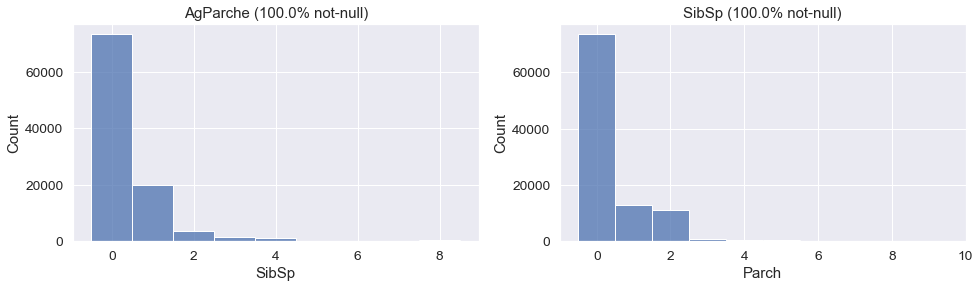

In [15]:
sibSp_not_null_percent = passenger_data.loc[pd.notna(passenger_data.SibSp)].SibSp.shape[0] / passenger_data.SibSp.shape[0] * 100
parch_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Parch)].Parch.shape[0] / passenger_data.Parch.shape[0] * 100

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="SibSp", discrete=True, ax = axes[0])
axes[1].set_title(f"SibSp ({sibSp_not_null_percent}% not-null)")

sns.histplot(passenger_data, x="Parch", discrete=True, ax = axes[1])
axes[0].set_title(f"Parch ({parch_not_null_percent}% not-null)")

Text(0.5, 1.0, 'Embarked (99.75% not-null)')

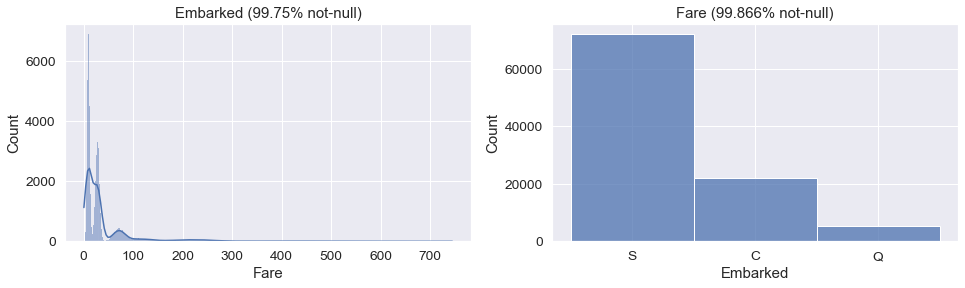

In [17]:
fare_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Fare)].Fare.shape[0] / passenger_data.Fare.shape[0] * 100
embarked_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Embarked)].Embarked.shape[0] / passenger_data.Embarked.shape[0] * 100

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="Fare", discrete=True, ax = axes[0])
axes[1].set_title(f"Fare ({fare_not_null_percent}% not-null)")

sns.histplot(passenger_data, x="Embarked", discrete=True, ax = axes[1])
axes[0].set_title(f"Embarked ({embarked_not_null_percent}% not-null)")

### Name statistics

In [42]:
passenger_data['LastName'] = passenger_data.Name.map(lambda p: p.split(',')[0])
passenger_data['FirstName'] = passenger_data.Name.map(lambda p: p.split(',')[1])
passenger_data.Name.describe()

count            100000
unique            92144
top       Johnson, John
freq                 31
Name: Name, dtype: object

### First Name statistics

In [43]:
passenger_data.FirstName.describe()

count     100000
unique      3953
top        James
freq        2112
Name: FirstName, dtype: object

### Last Name statistics

In [44]:
passenger_data.LastName.describe()

count     100000
unique     21558
top        Smith
freq        1162
Name: LastName, dtype: object

### Ticket statistics

In [45]:
passenger_data.Ticket.describe()

count     95377
unique    75331
top        A/5 
freq        602
Name: Ticket, dtype: object

### Cabin statistics

In [46]:
passenger_data.Cabin.describe()

count      32134
unique     26992
top       C19828
freq           6
Name: Cabin, dtype: object

# Data exploration

# Summary